In [1]:
import base64
import xml.etree.ElementTree as ET
import subprocess

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from rdkit.Chem import rdChemReactions
from molvs import standardize_smiles

In [3]:
from IPython.display import SVG, display

def display_reaction(smarts):
    rxn = AllChem.ReactionFromSmarts(smarts, useSmiles=True)
    d = Draw.MolDraw2DSVG(600, 300)
    d.DrawReaction(rxn)
    d.FinishDrawing()

    svg = d.GetDrawingText()
    svg2 = svg.replace('svg:','').replace(':svg', '')
    svg3 = SVG(svg2)
    display(svg3)

In [6]:
path = "reaxys.xml"

In [8]:
et = ET.parse(path)
root = et.getroot()
reactions = root.find("reactions")
print("total reactions:", len(list(reactions)))

In [122]:
def reaction_smiles_from_ry(ry):
    rct, pro = list(ry)
    molblock_rct = rx_id + rct.text
    rct_mol = Chem.MolFromMolBlock(molblock_content)
    molblock_pro = rx_id + pro.text
    pro_mol = Chem.MolFromMolBlock(molblock_pro)
    rxn_smi = Chem.MolToSmiles(rct_mol) + ">>" + Chem.MolToSmiles(pro_mol)
    return rxn_smi

In [134]:
def reaction_from_rxnfile_string(rxnfilestr):
    command = ["java", "decode_molfile_frombase64.java", rxnfilestr]
    return subprocess.check_output(command).decode()

In [139]:
smi = []
for rxn in list(reactions)[0:10]:
    rx, *rxds, ry = list(rxn)
    rx_id = rx.find('RX.ID').text
    rx_rxnfile = rx.find('RX.RXNFILE').text
    print(reaction_from_rxnfile_string(rx_rxnfile))
    print("================")
    smi.append(reaction_smiles_from_ry(ry))

$RXN



  1  0
$MOL

  R>Mv4.0000000000002D 1   1.00000     0.00000     0

  8  8  0  0  0  0  0  0  0  0999 V2000
    3.0702    2.2222    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6573    1.4131    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.3793    3.1733    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0702    2.2222    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2513    0.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.6524    1.5181    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5702    3.7613    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.7611    3.1733    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  3  2  0  0  0  0
  1  4  1  0  0  0  0
  2  5  2  0  0  0  0
  2  6  2  0  0  0  0
  3  7  1  0  0  0  0
  4  8  2  0  0  0  0
  7  8  1  0  0  0  0
M  REG 113433
M  END


$RXN



  1  1
$MOL

  R>Mv4.0000000000002D 1   1.00000     0.00000     0

 11 12  0  0  0  0  0  0  0  0999 V2000
    3.1844 

$RXN



  0  0


$RXN



  1  0
$MOL

  R>Mv4.0000000000002D 1   1.00000     0.00000     0

 13 14  0  0  0  0  0  0  0  0999 V2000
    3.9675    2.0063    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9675    3.0044    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0984    1.5022    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9166    1.6982    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9166    3.3124    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.1024    3.5065    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2323    2.0003    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.5027    2.5053    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.2323    3.0024    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3662    1.5002    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.5028    2.5053    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.5001    1.9983    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3672    0.5001    0.00

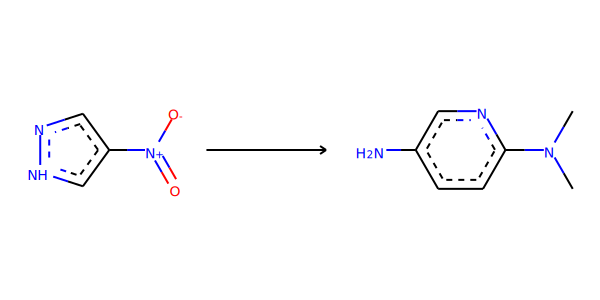

In [140]:
display_reaction(smi[2])

<!--  -->

# ====================

In [38]:
ag_smiles = [('sodium hydroxide', '[OH-].[Na+]'),
 ('water', 'O'),
 ('acetic acid', 'CC(=O)O'),
 ('sodium methylate', 'C[O-].[Na+]'),
 ('triethylamine', 'CCN(CC)CC'),
 ('N-ethyl-N,N-diisopropylamine', 'CCN(C(C)C)C(C)C'),
 ('tartaric acid', 'C(C(C(=O)O)O)(C(=O)O)O'),
 ('hydrogenchloride', 'Cl'),
 ('cerium(III) chloride', '[Cl-].[Cl-].[Cl-].[Ce+3]'),
 ('n-butyllithium', '[Li]CCCC'),
 ('sulfuric acid', 'OS(=O)(=O)O'),
 ('potassium tert-butylate', 'CC(C)(C)[O-].[K+]'),
 ('palladium diacetate', 'CC(=O)[O-].CC(=O)[O-].[Pd+2]'),
 ('triphenylphosphine', 'c1ccc(cc1)P(c2ccccc2)c3ccccc3'),
 ('sodium tetrahydroborate', '[BH4-].[Na+]'),
 ('toluene-4-sulfonic acid', 'Cc1ccc(cc1)S(=O)(=O)O'),
 ('citric acid', 'C(C(=O)O)C(CC(=O)O)(C(=O)O)O'),
 ('dmap', 'CN(C)c1ccncc1'),
 ('sodium hydride', '[H-].[Na+]'),
 ('lithium chloride', '[Cl-].[Li+]'),
 ('caesium carbonate', 'C(=O)([O-])[O-].[Cs+].[Cs+]'),
 ('sodium chloride', '[Cl-].[Na+]'),
 ('sodium t-butanolate', 'CC(C)(C)[O-].[Na+]'),
 ('ethanol', 'CCO'),
 ('methanesulfonyl chloride', 'CS(=O)(=O)Cl'),
 ('pyridine', 'c1ccncc1'),
 ('methanol', 'CO'),
 ('potassium hydroxide', '[OH-].[K+]'),
 ('C38H54FeN2O2(1+)*Cl(1-)', ''),
 ('(-)-diisopinocamphenylborane chloride', 'B([C@@H]1C[C@@H]2C[C@@H]([C@@H]1C)C2(C)C)[C@@H]3C[C@@H]4C[C@@H]([C@@H]3C)C4(C)C'),
 ('zinc(II) chloride', '[Cl-].[Cl-].[Zn+2]'),
 ('lanthanum(III) chloride', '[Cl-].[Cl-].[Cl-].[La+3]'),
 ('citric buffer', 'C(C(=O)O)C(CC(=O)O)(C(=O)O)O'),
 ('cerium chloride', '[Cl-].[Cl-].[Cl-].[Ce+3]'),
 ('3-ethyl-1-methyl-1H-imidazol-3-ium bromide', 'CCn1cc[n+](c1)C.[Br-]'),
 ('pyridinium p-toluenesulfonate', 'Cc1ccc(cc1)S(=O)(=O)[O-].c1cc[nH+]cc1'),
 ('toluene-4-sulfonamide', 'Cc1ccc(cc1)S(=O)(=O)N'),
 ('hydrazine', 'NN'),
 ('ammonium chloride', '[NH4+].[Cl-]'),
 ('ethyl acetate', 'CCOC(=O)C'),
 ('sodium hexamethyldisilazane', 'C[Si](C)(C)[N-][Si](C)(C)C.[Na+]'),
 ('lithium tert-butoxide', 'CC(C)(C)[O-].[Li+]'),
 ('18-crown-6 ether', 'C1COCCOCCOCCOCCOCCO1'),
 ('potassium 2-methylbutan-2-olate', 'CCC(C)(C)[O-][K+]'),
 ('C38H54ClFeN2O2', ''),
 ('1-butyl-1-methylpyrrolidinium hexafluorophosphate', 'CCCC[N+]1(CCCC1)C.F[P-](F)(F)(F)(F)F'),
 ('sodium hydrogencarbonate', 'C(=O)(O)[O-].[Na+]'),
 ('1,8-diazabicyclo[5.4.0]undec-7-ene', 'C1CCC2=NCCCN2CC1'),
 ('caustic lye', '[OH-][Na+]'),
 ('silica gel', ''),
 ('toluene', 'Cc1ccccc1'),
 ('methyllithium', '[Li]C'),
 ('lithium bromide', '[Br-][Li+]'),
 ('pyrographite', ''),
 ('sodium acetate', 'CC(=O)[O-].[Na+]'),
 ('aminoguanidine bicarbonate', 'C(=N)(N)NN.C(=O)(O)O'),
 ('(1,4,7,10-tetraoxacyclododecane)', 'C1COCCOCCOCCO1'),
 ('15-crown-5', 'C1COCCOCCOCCOCCO1'),
 ('polyethyleneglycol-1500', ''),
 ('polyethyleneglycol-600', ''),
 ('piperidine', 'C1CCNCC1'),
 ('selenium(IV) oxide', 'O=[Se]=O'),
 ('(-)-diisochlorodiisopinocampheylborane', 'B([C@@H]1C[C@@H]2C[C@@H]([C@@H]1C)C2(C)C)[C@@H]3C[C@@H]4C[C@@H]([C@@H]3C)C4(C)C'),
 ('1,2-dichloro-ethane', 'C(CCl)Cl'),
 ('1-methyl-pyrrolidin-2-one', 'CN1CCCC1=O'),
 ('2-methyl-propan-1-ol', 'CC(C)CO'),
 ('4-methyl-2-pentanone', 'CC(C)CC(=O)C'),
 ('isopropyl acetate', 'CC(C)OC(=O)C'),
 ('N,N-dimethyl-formamide', 'CN(C)C=O'),
 ('acetone', 'CC(=O)C'),
 ('acetonitrile', 'CC#N'),
 ('butanone', 'CCC(=O)C'),
 ('dichloromethane', 'C(Cl)Cl'),
 ('diethyl ether', 'CCOCC'),
 ('dimethyl sulfoxide', 'CS(=O)C'),
 ('hexane', 'СССССС'),
 ('hexane, n-', 'СССССС'),
 ('hexanes', 'СССССС'),
 ('isopropyl alcohol', 'CC(C)O'),
 ('mineral oil', ''),
 ('n-heptane', 'CCCCCCC'),
 ('tert-Amyl alcohol', 'CCC(C)(C)O'),
 ('tert-butyl alcohol', 'CC(C)(C)O'),
 ('tert-butyl methyl ether', 'CC(C)(C)OC'),
 ('tetrahydrofuran', 'C1CCOC1'),
 ('water-d2', '')]
ag_smiles = dict(ag_smiles)

In [4]:
import pandas as pd

In [5]:
path = "/home/andronov/Документы/reaxys/"

In [6]:
names = {"1": "montelucast", 
         "2": "oseltamivir", 
         "3": "esomeprasole", 
         "4": "atorvastatin", 
         "5": "darunavir", 
         "6": "lopinavir", 
         "7": "ritonavir", 
         "8": "lisinopril", 
         "9": "ibuprofen", 
         "10": "apixaban", 
         "11": "chloroquine", 
         "12": "codeine", 
         "13": "lenalidomide"}

In [7]:
filename = "1.xls"

In [108]:
data = pd.read_csv(path + filename, sep="\t")

In [109]:
data.head()

,Reaction ID,Reaction: Links to Reaxys,Data Count,Number of Reaction Details,Reaction Rank,Record Type,Reactant,Product,Bin,Reaction,...,Yield,Yield (numerical),Yield (optical),Stage Reactant,Reagent,Catalyst,Solvent (Reaction Details),References,Links to Reaxys,Unnamed: 41
0,25683565,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 112),6,95,full reaction; has preparation,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,montelukast,188189,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...,...,91percent,91.0,NaN,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,sodium hydroxide; ethanol; water; acetic acid,NaN,ethanol; water; toluene,NaN,NaN,NaN
1,25683565,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 112),6,95,full reaction; has preparation,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,montelukast,188189,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...,...,86 percent,86.0,NaN,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,sodium hydroxide; ethanol; water; water; aceti...,NaN,toluene,NaN,NaN,NaN
2,25683565,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 112),6,95,full reaction; has preparation,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,montelukast,188189,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...,...,83percent,83.0,NaN,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,sodium hydroxide; water; acetic acid,NaN,toluene; water; toluene,NaN,NaN,NaN
3,25683565,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 112),6,95,full reaction; has preparation,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,montelukast,188189,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...,...,NaN,NaN,NaN,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,sodium hydroxide; ethanol; water; acetic acid,NaN,water; toluene,NaN,NaN,NaN
4,25683565,https://www.reaxys.com/reaxys/secured/hopinto....,(1 of 112),6,95,full reaction; has preparation,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,montelukast,188189,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...,...,NaN,NaN,NaN,2-(1-((((R)-1-(3-((E)-2-(7-chloroquinolin-2-yl...,sodium hydroxide; water; water; acetic acid,NaN,NaN,NaN,NaN,NaN


In [110]:
# Working with only some columns
chosen_columns = ["Product", 
                  "Reaction", 
                  "Number of Reaction Steps", 
                  "Number of Reaction Details", 
                  "Number of Stages", 
                  "Reaction Type", 
                  "Reagent", 
                  "Catalyst", 
                  "Solvent (Reaction Details)"]
essent = data[chosen_columns]

In [111]:
# Determining agents, catalysts and solvents
from collections import Counter
reagents_counter = Counter(";".join(list(
    essent["Reagent"].dropna().values)).replace("; ", ";").split(';'))
solvent_counter = Counter(";".join(list(
    essent["Solvent (Reaction Details)"].dropna().values)).replace("; ", ";").split(';'))
catalyst_counter = Counter(";".join(list(
    essent["Catalyst"].dropna().values)).replace("; ", ";").split(';'))

# set(solvent_counter.keys()) - set(ag_smiles.keys())

# solvent_counter

# catalyst_counter

In [112]:
# Obtaining reaction smiles for all agents combined
agents = essent[["Reagent", "Catalyst", "Solvent (Reaction Details)"]].fillna('')
agents_cat = agents["Reagent"].str.cat(agents["Catalyst"], sep=';').str.cat(agents["Solvent (Reaction Details)"], sep=';')
agents_set = agents_cat.str.replace('; ', ';').str.split(';').apply(lambda x: set(x) - set(['']))
agents_smiles = agents_set.apply(lambda x: '.'.join([ag_smiles[i] if i in ag_smiles else '' for i in x]))

In [113]:
# Constructing whole reaction smiles with agents
reag_prod_smi = essent["Reaction"].str.split('>>', expand=True)
reag_prod_smi = pd.concat((reag_prod_smi, agents_smiles), axis=1)
reag_prod_smi.columns = ["reag", "prod", "ag"]
empty_reag_index = reag_prod_smi[reag_prod_smi['reag'] == ''].index
reaction_smi_with_agents = reag_prod_smi['reag'].str.cat(reag_prod_smi['ag'], sep='.').str.cat(reag_prod_smi['prod'], sep='>>')

In [114]:
reaction_smi_with_agents

0      CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
1      CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
2      CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
3      CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
4      CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
                             ...                        
216    .>>CC(C)(O)C1=C(CC[C@@H](SCC2(CC(O)=O)CC2)C2=C...
217    .>>CC(C)(O)C1=C(CC[C@@H](SCC2(CC(O)=O)CC2)C2=C...
218    .[OH-].[Na+].CC(=O)O.Cc1ccccc1.O>>CC(C)(O)C1=C...
219    .[OH-].[Na+].CCC(C)(C)O.CC(C)(C)OC.O.CC(=O)O>>...
220    .>>CC(C)(O)C1=C(CC[C@@H](SCC2(CC(O)=O)CC2)C2=C...
Name: reag, Length: 221, dtype: object

In [115]:
# Dropping reactions with absent reactant
essent = pd.concat((essent.drop("Reaction", axis=1), reaction_smi_with_agents), axis=1)
essent = essent.drop(empty_reag_index)
essent

,Product,Number of Reaction Steps,Number of Reaction Details,Number of Stages,Reaction Type,Reagent,Catalyst,Solvent (Reaction Details),reag
0,montelukast,1,6,2.0,NaN,sodium hydroxide; ethanol; water; acetic acid,NaN,ethanol; water; toluene,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
1,montelukast,1,6,2.0,NaN,sodium hydroxide; ethanol; water; water; aceti...,NaN,toluene,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
2,montelukast,1,6,2.0,NaN,sodium hydroxide; water; acetic acid,NaN,toluene; water; toluene,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
3,montelukast,1,6,2.0,NaN,sodium hydroxide; ethanol; water; acetic acid,NaN,water; toluene,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
4,montelukast,1,6,2.0,NaN,sodium hydroxide; water; water; acetic acid,NaN,NaN,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
...,...,...,...,...,...,...,...,...,...
208,montelukast,3,1,NaN,NaN,"dmap; 1,8-diazabicyclo[5.4.0]undec-7-ene; zinc...",NaN,tetrahydrofuran; 2-methyl-propan-1-ol; ethyl a...,CC(C)OC(=O)C1=C(CC[C@H](O)C2=CC(\C=C\C3=NC4=C(...
209,montelukast,3,1,NaN,NaN,lithium chloride; potassium hydroxide; sodium ...,NaN,tetrahydrofuran; acetonitrile,CC(=O)C1=CC=CC=C1CC[C@H](O)C1=CC(\C=C\C2=NC3=C...
210,montelukast,3,1,NaN,NaN,lanthanum(III) chloride; sodium hydride; lithi...,NaN,toluene; acetonitrile; butanone; mineral oil,O[C@@H](CCC1=C(C=CC=C1)C(=O)OC1=CC=CC=C1)C1=CC...
211,montelukast,2,1,NaN,NaN,sodium methylate; cerium chloride,NaN,tetrahydrofuran; methanol; dimethyl sulfoxide,COC(=O)C1=C(CC[C@H](OP(=O)(OC2=CC=CC=C2)OC2=CC...


In [96]:
# Dropping duplicates
essent_no_dupl = essent.drop_duplicates(subset="reag")

In [120]:
# Leaving only single-step reactions
final = essent_no_dupl[essent_no_dupl["Number of Reaction Steps"] == 1]

In [116]:
final.shape

(118, 10)

In [121]:
final

,Product,Number of Reaction Steps,Number of Reaction Details,Number of Stages,Reaction Type,Reagent,Catalyst,Solvent (Reaction Details),reag
0,montelukast,1,6,2.0,NaN,sodium hydroxide; ethanol; water; acetic acid,NaN,ethanol; water; toluene,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
2,montelukast,1,6,2.0,NaN,sodium hydroxide; water; acetic acid,NaN,toluene; water; toluene,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
4,montelukast,1,6,2.0,NaN,sodium hydroxide; water; water; acetic acid,NaN,NaN,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
5,montelukast,1,6,NaN,NaN,caustic lye,NaN,NaN,CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC#N)CC1)C1=C...
6,montelukast,1,4,NaN,NaN,triethylamine,NaN,"N,N-dimethyl-formamide",CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC(O)=O)CC1)C...
...,...,...,...,...,...,...,...,...,...
145,1-(((1(R)-(3-(2(E)-(7-chloro-2-quinolinyl)ethe...,1,1,2.0,NaN,sodium methylate; citric acid,NaN,"tetrahydrofuran; N,N-dimethyl-formamide; tolue...",COC(=O)CC1(CBr)CC1.[H][C@]12CC[C@](CS(O)(=O)=O...
156,montelukast,1,1,NaN,NaN,acetic acid,NaN,water; toluene,NC1CCCCC1.CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1(CC(...
157,montelukast,1,1,NaN,NaN,citric acid,NaN,water; ethyl acetate,CC(C)CNCC(C)C.CC(C)(O)C1=CC=CC=C1CC[C@@H](SCC1...
160,"(R,E)-2-((1-((1-(3-(2-(7-chloroquinolin-2-yl)v...",1,1,2.0,NaN,sodium hydroxide; ethanol; water; hydrogenchlo...,NaN,toluene,NaN


In [122]:
save_path = "data/montelucast_agents.csv"
final['reag'].to_csv(save_path, header=None, index=None)

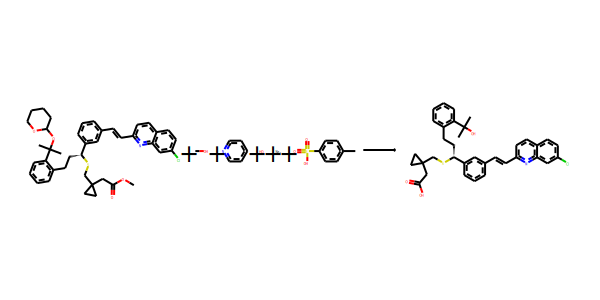

In [125]:
display_reaction(final['reag'].iloc[9])